<a href="https://colab.research.google.com/github/fransB26/BANKDATASET-CLASSIFICATION-With-DT/blob/main/KLASIFIKASI_BANK_DECISION_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Memanggil library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Memanggil dataset
banking = pd.read_csv('/content/banking.csv')
banking

age          job  marital            education  default housing loan  \
0       44  blue-collar  married             basic.4y  unknown     yes   no   
1       53   technician  married              unknown       no      no   no   
2       28   management   single    university.degree       no     yes   no   
3       39     services  married          high.school       no      no   no   
4       55      retired  married             basic.4y       no     yes   no   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   59      retired  married          high.school  unknown      no  yes   
41184   31    housemaid  married             basic.4y  unknown      no   no   
41185   42       admin.   single    university.degree  unknown     yes  yes   
41186   48   technician  married  professional.course       no      no  yes   
41187   25      student   single          high.school       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0       cellular   aug         thu  ...         1    999         0   
1       cellular   nov         fri  ...         1    999         0   
2       cellular   jun         thu  ...         3      6         2   
3       cellular   apr         fri  ...         2    999         0   
4       cellular   aug         fri  ...         1      3         1   
...          ...   ...         ...  ...       ...    ...       ...   
41183  telephone   jun         thu  ...         1    999         0   
41184  telephone   may         thu  ...         2    999         0   
41185  telephone   may         wed  ...         3    999         0   
41186  telephone   oct         tue  ...         2    999         0   
41187  telephone   may         fri  ...         4    999         0   

          poutcome emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0      nonexistent          1.4          93.444          -36.1      4.963   
1      nonexistent         -0.1          93.200          -42.0      4.021   
2          success         -1.7          94.055          -39.8      0.729   
3      nonexistent         -1.8          93.075          -47.1      1.405   
4          success         -2.9          92.201          -31.4      0.869   
...            ...          ...             ...            ...        ...   
41183  nonexistent          1.4          94.465          -41.8      4.866   
41184  nonexistent          1.1          93.994          -36.4      4.860   
41185  nonexistent          1.1          93.994          -36.4      4.857   
41186  nonexistent         -3.4          92.431          -26.9      0.742   
41187  nonexistent          1.1          93.994          -36.4      4.859   

       nr_employed  y  
0           5228.1  0  
1           5195.8  0  
2           4991.6  1  
3           5099.1  0  
4           5076.2  1  
...            ... ..  
41183       5228.1  0  
41184       5191.0  0  
41185       5191.0  0  
41186       5017.5  0  
41187       5191.0  0  

[41188 rows x 21 columns]

In [ ]:
#Mengecek Dataset
banking.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [ ]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
banking.shape

(41188, 21)

In [ ]:
#Mengubah data object ke int
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for column in banking:
  if banking[column].dtypes == 'object':
    banking[column] = le.fit_transform(banking[column])

In [ ]:
banking

age  job  marital  education  default  housing  loan  contact  month  \
0       44    1        1          0        1        2     0        0      1   
1       53    9        1          7        0        0     0        0      7   
2       28    4        2          6        0        2     0        0      4   
3       39    7        1          3        0        0     0        0      0   
4       55    5        1          0        0        2     0        0      1   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   59    5        1          3        1        0     2        1      4   
41184   31    3        1          0        1        0     0        1      6   
41185   42    0        2          6        1        2     2        1      6   
41186   48    9        1          5        0        0     2        1      8   
41187   25    8        2          3        0        0     0        1      6   

       day_of_week  ...  campaign  pdays  previous  poutcome  emp_var_rate  \
0                2  ...         1    999         0         1           1.4   
1                0  ...         1    999         0         1          -0.1   
2                2  ...         3      6         2         2          -1.7   
3                0  ...         2    999         0         1          -1.8   
4                0  ...         1      3         1         2          -2.9   
...            ...  ...       ...    ...       ...       ...           ...   
41183            2  ...         1    999         0         1           1.4   
41184            2  ...         2    999         0         1           1.1   
41185            4  ...         3    999         0         1           1.1   
41186            3  ...         2    999         0         1          -3.4   
41187            0  ...         4    999         0         1           1.1   

       cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0              93.444          -36.1      4.963       5228.1  0  
1              93.200          -42.0      4.021       5195.8  0  
2              94.055          -39.8      0.729       4991.6  1  
3              93.075          -47.1      1.405       5099.1  0  
4              92.201          -31.4      0.869       5076.2  1  
...               ...            ...        ...          ... ..  
41183          94.465          -41.8      4.866       5228.1  0  
41184          93.994          -36.4      4.860       5191.0  0  
41185          93.994          -36.4      4.857       5191.0  0  
41186          92.431          -26.9      0.742       5017.5  0  
41187          93.994          -36.4      4.859       5191.0  0  

[41188 rows x 21 columns]

In [ ]:
#splitting data
X = banking.iloc[:,:-1]
Y = banking.iloc[:,-1]

In [ ]:
print(X,Y)

       age  job  marital  education  default  housing  loan  contact  month  \
0       44    1        1          0        1        2     0        0      1   
1       53    9        1          7        0        0     0        0      7   
2       28    4        2          6        0        2     0        0      4   
3       39    7        1          3        0        0     0        0      0   
4       55    5        1          0        0        2     0        0      1   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   59    5        1          3        1        0     2        1      4   
41184   31    3        1          0        1        0     0        1      6   
41185   42    0        2          6        1        2     2        1      6   
41186   48    9        1          5        0        0     2        1      8   
41187   25    8        2          3        0        0     0        1      6   

       day_of_week  duration  campaign  pdays  prev

In [ ]:
#Train test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)


In [ ]:
#fitting
clf = DecisionTreeClassifier(random_state = 0,
                                      max_depth = None, min_samples_split=2,
                                      min_samples_leaf=  1, min_weight_fraction_leaf=0,
                                      max_leaf_nodes=None,min_impurity_decrease=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(min_impurity_decrease=0, min_weight_fraction_leaf=0,
                       random_state=0)

In [ ]:
#Predict terhadap x_test
y_pred = clf.predict(X_test)
print(y_pred)

[0 1 0 ... 0 0 0]


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.31527 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.31527 to fit



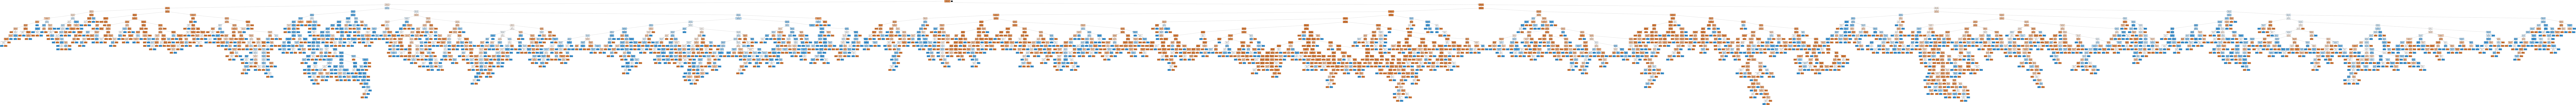

In [ ]:
#Visualisasi Tree
import pydotplus
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None, filled=True,feature_names= banking.columns[:-1])
from IPython.display import Image
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('banking.png')
Image(graph.create_png())

In [ ]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10981
           1       0.50      0.52      0.51      1376

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357



In [ ]:
#Akurasi Model
print("Akurasi :",metrics.accuracy_score(y_test,y_pred))

Akurasi : 0.8895362952172857


Perhitungan skor feature apa yang paling penting

Feature: age Score:  0.09785650328281559 %
Feature: job Score:  0.04227804828105762 %
Feature: marital Score:  0.021469753433720814 %
Feature: education Score:  0.04036466054196759 %
Feature: default Score:  0.009895679585586625 %
Feature: housing Score:  0.018258325735958796 %
Feature: loan Score:  0.009627841463402724 %
Feature: contact Score:  0.007490906914317119 %
Feature: month Score:  0.015329909105504911 %
Feature: day_of_week Score:  0.0422387973656068 %
Feature: duration Score:  0.34191279314721224 %
Feature: campaign Score:  0.033823808078960516 %
Feature: pdays Score:  0.025906484725037218 %
Feature: previous Score:  0.009427262814818248 %
Feature: poutcome Score:  0.007949471852544824 %
Feature: emp_var_rate Score:  0.0017529782932430424 %
Feature: cons_price_idx Score:  0.01409128692848118 %
Feature: cons_conf_idx Score:  0.024458886729427844 %
Feature: euribor3m Score:  0.0804297827949609 %
Feature: nr_employed Score:  0.15543681892537523 %


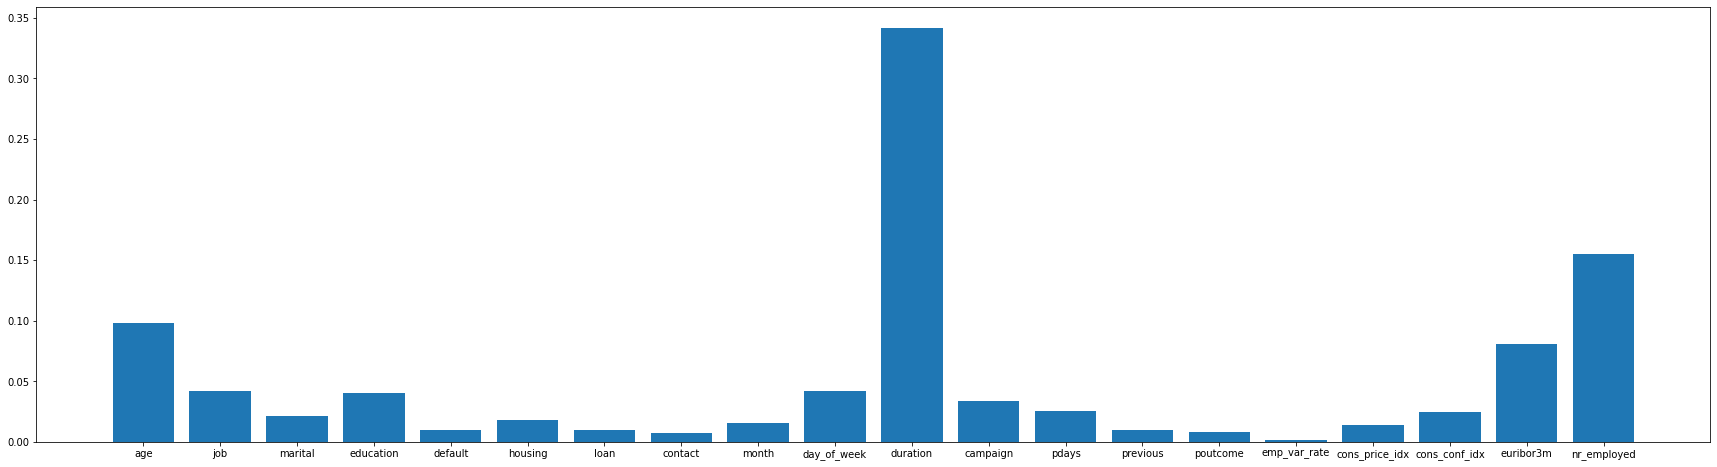

In [ ]:
import matplotlib.pyplot as plt

importance = clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature:', banking.columns[:-1][i],'Score: ', v, '%')
# plot feature importance
plt.figure(figsize=(30,8))
plt.bar([x for x in banking.columns[:-1]], importance)
plt.show()